# Deal with data repetition

In [1]:
#load libraries
from datetime import datetime, timedelta
from dateutil import parser
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from cesium import featurize
import os
from glob import glob

/anaconda3/envs/p3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [263]:
#check for each ts_format to locate the error
PATH = "/Users/leeo/Desktop/KI2/7.master_thesis/1.data/5.revised_data/17273_ts"
EXT = "*.csv"
all_csv_files = [file
                 for path, subdir, files in os.walk(PATH)
                 for file in glob(os.path.join(path, EXT))]

/anaconda3/envs/p3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/envs/p3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/envs/p3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


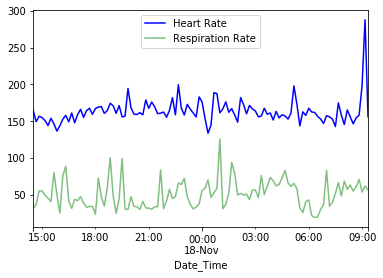

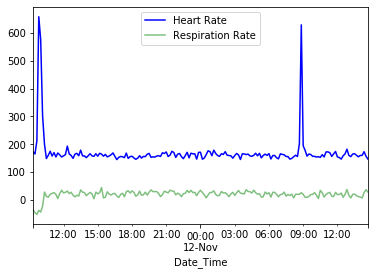

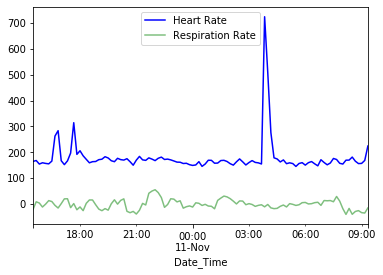

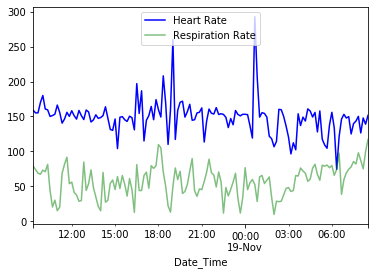

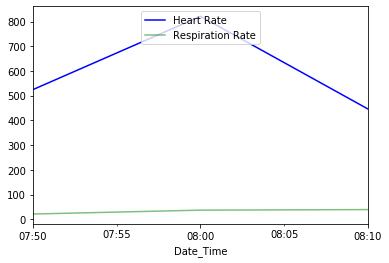

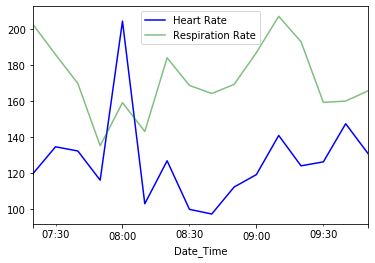

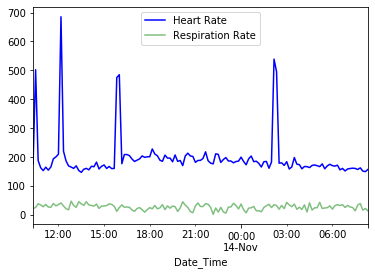

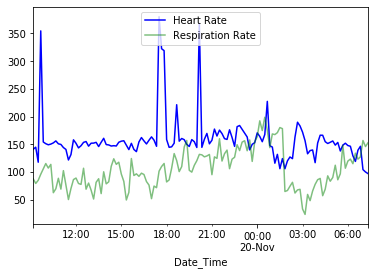

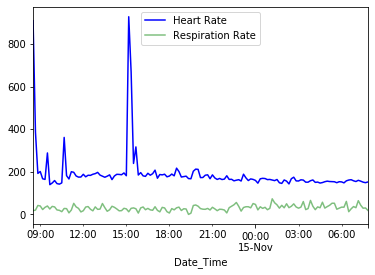

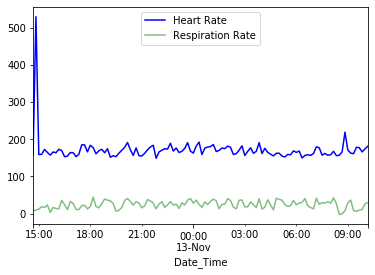

In [264]:
#print the data one by one
time_start = []
time_end = []
date = []
for i in all_csv_files:
    data = pd.read_csv(i, sep=",", header=0,
                       parse_dates=[0], index_col=0)
    #print("The shape of data is: ", data.shape)
    plt.figure()
    data["HR"].resample("10T").mean().plot(color="b",alpha=1)
    (data["Resp"]*10).resample("10T").mean().plot(color="g",alpha=0.5,subplots=True, figsize=(6, 6));
    plt.legend(["Heart Rate", "Respiration Rate"],loc="upper center")
    #print("The starting time of the data is: ",data.index[0])
    #print("The ending time of the data is: ",data.index[-1])
    time_start.append(data.index[0])
    time_end.append(data.index[-1])
    date.append(i[-14:-4])

In [265]:
#check the overlapping period
data_repetition = pd.DataFrame(list(zip(date, time_start, time_end)),
              columns=['date','time_start','time_end']).sort_values(by=['time_start']).reset_index()
data_repetition

,index,date,time_start,time_end
0,2,3_10-11-17,2017-11-10 15:36:35.629100,2017-11-11 09:22:31.129099999
1,1,3_11-11-17,2017-11-11 09:25:25.520700,2017-11-12 14:44:28.520700000
2,9,3_12-11-17,2017-11-12 14:46:55.121100,2017-11-13 10:19:25.121100000
3,6,3_13-11-17,2017-11-13 10:21:48.855800,2017-11-14 08:28:05.284900000
4,8,3_14-11-17,2017-11-14 08:30:53.761200,2017-11-15 07:51:31.261200000
5,4,3_15-11-17,2017-11-15 07:55:19.826900,2017-11-15 08:19:58.326900000
6,0,3_17-11-17,2017-11-17 14:33:28.609200,2017-11-18 09:26:19.130100000
7,3,3_18-11-17,2017-11-18 09:28:33.026800,2017-11-19 08:39:40.026800000
8,7,3_19-11-17,2017-11-19 09:18:55.953700,2017-11-20 07:23:51.453700000
9,5,3_20-11-17,2017-11-20 07:26:55.439200,2017-11-20 09:58:35.439200000


In [269]:
#if the time margin less than 0, means overlapping
time_margin = []
for i in range(len(data_repetition.time_start)-1):
    time_margin.append(data_repetition.time_start[i+1]-data_repetition.time_end[i])
time_margin

[Timedelta('0 days 00:02:54.391600'),
 Timedelta('0 days 00:02:26.600400'),
 Timedelta('0 days 00:02:23.734700'),
 Timedelta('0 days 00:02:48.476300'),
 Timedelta('0 days 00:03:48.565700'),
 Timedelta('2 days 06:13:30.282300'),
 Timedelta('0 days 00:02:13.896700'),
 Timedelta('0 days 00:39:15.926900'),
 Timedelta('0 days 00:03:03.985500')]

The shape of data is:  (140701, 3)


Text(2017-11-15 07:55:19.826900, -150, '-1.5mmHg')

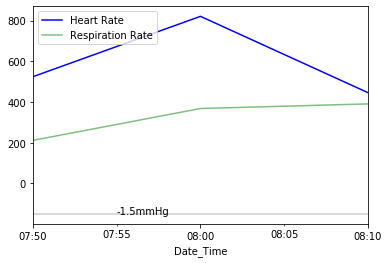

In [267]:
#remove the overlapping period
data_revised = pd.read_csv(all_csv_files[4], sep=",", header=0,
                   parse_dates=[0], index_col=0)
#quick look at the data
print("The shape of data is: ", data.shape)
data_revised["HR"].resample("10T").mean().plot(color="b",alpha=1)
(data_revised["Resp"]*100).resample("10T").mean().plot(color="g",alpha=0.5)
plt.legend(["Heart Rate", "Respiration Rate"],
          loc="upper left")
plt.axhline(-150, alpha=0.2, color ="black")
plt.text(data_revised.index[0],-150,'-1.5mmHg', color ="black")

In [268]:
data_revised
#data_revised.loc["2019-11-25 00:41:52.000":]
#slice the data if needed
#combined_data = data_revised.loc["2019-11-25 00:41:52.000":]

,HR,Resp,Comments
Date_Time,,,
2017-11-15 07:55:19.826900,152.3521,2.078454,NaN
2017-11-15 07:55:20.326900,152.2273,2.005431,NaN
2017-11-15 07:55:20.826900,153.1015,2.838859,NaN
2017-11-15 07:55:21.326900,155.1165,2.377680,NaN
2017-11-15 07:55:21.826900,153.2403,2.148535,NaN
2017-11-15 07:55:22.326900,153.5086,3.016523,NaN
2017-11-15 07:55:22.826900,151.1994,2.296071,NaN
2017-11-15 07:55:23.326900,151.9067,1.831085,NaN
2017-11-15 07:55:23.826900,150.6661,2.967438,NaN


In [240]:
#Export the data, remove the repetition
object_path = all_csv_files[0]
export_csv = combined_data.to_csv(object_path, header=True)

# Combine individual files of same objects -checkpoint 1

In [372]:
from os import listdir
from os.path import isfile, join
ts_dir = '/Users/leeo/Desktop/KI2/7.master_thesis/1.data/5.revised_data/18163_ts'

combined_data = []
for f in listdir(ts_dir):
    file_path = ts_dir+"/"+f
    data = pd.read_csv(file_path, sep=",", header=0,
                   parse_dates=[0], index_col=0)
    # store DataFrame in list
    combined_data.append(data)
#concat all data in one
combined_data = pd.concat(combined_data).sort_index()

In [373]:
#check the comments for label
combined_data["Comments"][combined_data["Comments"].isnull()==False]

Series([], Name: Comments, dtype: float64)

The shape of data is:  (718622, 3)


Text(2018-08-12 08:18:23.572600, -1000, '3rd injection')

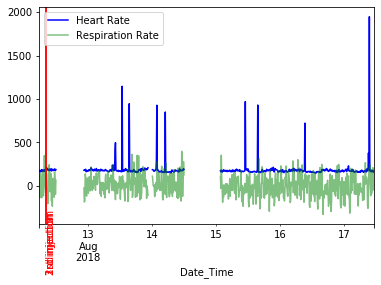

In [374]:
t1 = pd.to_datetime("2018-8-12 08:18:23.572600") 
t2 = t1
t3 = t1

#quick look at the data
print("The shape of data is: ", combined_data.shape)
combined_data["HR"].resample("10T").mean().plot(color="b",alpha=1)
(combined_data["Resp"]*100).resample("10T").mean().plot(color="g",alpha=0.5)
plt.legend(["Heart Rate", "Respiration Rate"],
          loc="upper left")
plt.axvline(t1, alpha=0.8, color ="red")
plt.text(t1,-1000,'1st injection', color ="red",rotation=90)
plt.axvline(t2, alpha=0.8, color ="red")
plt.text(t2,-1000,'2nd injection', color ="red",rotation=90)
plt.axvline(t3, alpha=0.8, color ="red")
plt.text(t3,-1000,'3rd injection', color ="red",rotation=90)

In [375]:
#Export the data
object_path ='/Users/leeo/Desktop/KI2/7.master_thesis/1.data/6.revised_object_data_combined/'+ts_dir[-8:-3]+".csv"
export_csv = combined_data.to_csv(object_path, header=True)

In [370]:
#check the repetition situation for each object
#don't have to run this cell every time
#specify the data dir
PATH = "/Users/leeo/Desktop/KI2/7.master_thesis/1.data/6.revised_object_data_combined"
EXT = "*.csv"
all_csv_files = [file
                 for path, subdir, files in os.walk(PATH)
                 for file in glob(os.path.join(path, EXT))]
for f in all_csv_files:
    data = pd.read_csv(f, sep=",", header=0,
                       parse_dates=[0], index_col=0)
    if data.index[1] - data.index[0] < pd.Timedelta("0.5s"):
        print(f)

/Users/leeo/Desktop/KI2/7.master_thesis/1.data/6.revised_object_data_combined/18163.csv
/Users/leeo/Desktop/KI2/7.master_thesis/1.data/6.revised_object_data_combined/17273.csv


# Deal with data duplication -checkpoint 2

In [15]:
#check the duplication situation for each object
#don't have to run this cell every time
#specify the data dir
PATH = "/Users/leeo/Desktop/KI2/7.master_thesis/1.data/6.revised_object_data_combined"
EXT = "*.csv"
all_csv_files = [file
                 for path, subdir, files in os.walk(PATH)
                 for file in glob(os.path.join(path, EXT))]
for f in all_csv_files:
    data = pd.read_csv(f, sep=",", header=0,
                       parse_dates=[0], index_col=0)
    
    if data.duplicated().sum() !=0:
        percent = data.duplicated().sum()/len(data)
        print("There were duplications for {} before, which is: {}, account for {:.2%} of the entire sample".format(f[-9:], data.duplicated().sum(), percent))
        data = data.drop_duplicates(keep="first")
        print("After removing the duplication, now is:",data.duplicated().sum())
        data.to_csv(f, header=True)

There were duplications for 19286.csv before, which is: 14184, account for 1.09% of the entire sample
After removing the duplication, now is: 0
There were duplications for 19234.csv before, which is: 1, account for 0.00% of the entire sample
After removing the duplication, now is: 0
There were duplications for 18248.csv before, which is: 1, account for 0.00% of the entire sample
After removing the duplication, now is: 0
There were duplications for 19221.csv before, which is: 2, account for 0.00% of the entire sample
After removing the duplication, now is: 0
There were duplications for 18279.csv before, which is: 2, account for 0.00% of the entire sample
After removing the duplication, now is: 0
There were duplications for 18251.csv before, which is: 37, account for 0.00% of the entire sample
After removing the duplication, now is: 0
There were duplications for 19205.csv before, which is: 2, account for 0.00% of the entire sample
After removing the duplication, now is: 0
There were dupl

# Remove the block of noise -checkpoint 3
- noise at the beginning
- noise in the end
- noise in some certain periods

In [41]:
PATH = "/Users/leeo/Desktop/KI2/7.master_thesis/1.data/8.revised_object_data_combined_vc3"
EXT = "*.csv"
all_csv_files = [file
                 for path, subdir, files in os.walk(PATH)
                 for file in glob(os.path.join(path, EXT))]

In [ ]:
f = all_csv_files[22]
data = pd.read_csv(f, sep=",", header=0,
                       parse_dates=[0], index_col=0)
    
# check the comments for label
print(f)
print(data["Comments"][data["Comments"].isnull()==False])

The shape of data is:  (1311597, 3)


Text(2018-08-16 16:53:42.676220, -150, '-1.5mmHg')

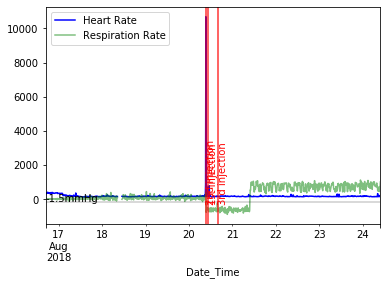

In [379]:
t1 = pd.to_datetime("2018-8-20 10:18:23.572600") 
t2 = pd.to_datetime("2018-8-20 9:15:23.572600") 
t3 = pd.to_datetime("2018-8-20 16:18:23.572600") 

#quick look at the data
print("The shape of data is: ", data.shape)
data["HR"].resample("10T").mean().plot(color="b",alpha=1)
(data["Resp"]*100).resample("10T").mean().plot(color="g",alpha=0.5)
plt.legend(["Heart Rate", "Respiration Rate"],
          loc="upper left")
plt.axvline(t1, alpha=0.8, color ="red")
plt.text(t1,-200,'1st injection', color ="red",rotation=90)
plt.axvline(t2, alpha=0.8, color ="red")
plt.text(t2,-200,'2nd injection', color ="red",rotation=90)
plt.axvline(t3, alpha=0.8, color ="red")
plt.text(t3,-200,'3rd injection', color ="red",rotation=90)
plt.axhline(-150, alpha=0.2, color ="black")
plt.text(data.index[0],-150,'-1.5mmHg', color ="black")

In [384]:
#check the data
data =data.loc['2018-08-16 16:59:42.676220':] 

#export the data
#data.to_csv(f, header=True)


The shape of data is:  (1310885, 3)


Text(2018-08-16 16:59:42.740860, -150, '-1.5mmHg')

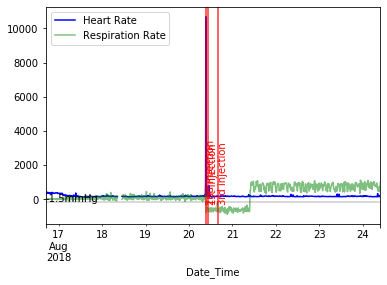

In [383]:
#quick look at the data
print("The shape of data is: ", data.shape)
data["HR"].resample("10T").mean().plot(color="b",alpha=1)
(data["Resp"]*100).resample("10T").mean().plot(color="g",alpha=0.5)
plt.legend(["Heart Rate", "Respiration Rate"],
          loc="upper left")
plt.axvline(t1, alpha=0.8, color ="red")
plt.text(t1,-200,'1st injection', color ="red",rotation=90)
plt.axvline(t2, alpha=0.8, color ="red")
plt.text(t2,-200,'2nd injection', color ="red",rotation=90)
plt.axvline(t3, alpha=0.8, color ="red")
plt.text(t3,-200,'3rd injection', color ="red",rotation=90)
plt.axhline(-150, alpha=0.2, color ="black")
plt.text(data.index[0],-150,'-1.5mmHg', color ="black")

/anaconda3/envs/p3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


/Users/leeo/Desktop/KI2/7.master_thesis/1.data/7.revised_object_data_combined_vc2/19118.csv


/anaconda3/envs/p3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


/Users/leeo/Desktop/KI2/7.master_thesis/1.data/7.revised_object_data_combined_vc2/19286.csv


/anaconda3/envs/p3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


/Users/leeo/Desktop/KI2/7.master_thesis/1.data/7.revised_object_data_combined_vc2/19244.csv
/Users/leeo/Desktop/KI2/7.master_thesis/1.data/7.revised_object_data_combined_vc2/18163.csv


/anaconda3/envs/p3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


/Users/leeo/Desktop/KI2/7.master_thesis/1.data/7.revised_object_data_combined_vc2/19231.csv


/anaconda3/envs/p3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


/Users/leeo/Desktop/KI2/7.master_thesis/1.data/7.revised_object_data_combined_vc2/18273.csv


/anaconda3/envs/p3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


/Users/leeo/Desktop/KI2/7.master_thesis/1.data/7.revised_object_data_combined_vc2/19234.csv


/anaconda3/envs/p3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


/Users/leeo/Desktop/KI2/7.master_thesis/1.data/7.revised_object_data_combined_vc2/18248.csv


/anaconda3/envs/p3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


/Users/leeo/Desktop/KI2/7.master_thesis/1.data/7.revised_object_data_combined_vc2/19221.csv
/Users/leeo/Desktop/KI2/7.master_thesis/1.data/7.revised_object_data_combined_vc2/18279.csv


/anaconda3/envs/p3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


/Users/leeo/Desktop/KI2/7.master_thesis/1.data/7.revised_object_data_combined_vc2/18251.csv


/anaconda3/envs/p3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


/Users/leeo/Desktop/KI2/7.master_thesis/1.data/7.revised_object_data_combined_vc2/19205.csv


/anaconda3/envs/p3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


/Users/leeo/Desktop/KI2/7.master_thesis/1.data/7.revised_object_data_combined_vc2/18284.csv
/Users/leeo/Desktop/KI2/7.master_thesis/1.data/7.revised_object_data_combined_vc2/18044.csv


/anaconda3/envs/p3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


/Users/leeo/Desktop/KI2/7.master_thesis/1.data/7.revised_object_data_combined_vc2/18233.csv
/Users/leeo/Desktop/KI2/7.master_thesis/1.data/7.revised_object_data_combined_vc2/18230.csv


/anaconda3/envs/p3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


/Users/leeo/Desktop/KI2/7.master_thesis/1.data/7.revised_object_data_combined_vc2/18231.csv


/anaconda3/envs/p3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


/Users/leeo/Desktop/KI2/7.master_thesis/1.data/7.revised_object_data_combined_vc2/19117.csv
/Users/leeo/Desktop/KI2/7.master_thesis/1.data/7.revised_object_data_combined_vc2/18036.csv


/anaconda3/envs/p3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


/Users/leeo/Desktop/KI2/7.master_thesis/1.data/7.revised_object_data_combined_vc2/18181.csv


/anaconda3/envs/p3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


/Users/leeo/Desktop/KI2/7.master_thesis/1.data/7.revised_object_data_combined_vc2/17273.csv


/anaconda3/envs/p3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':
/anaconda3/envs/p3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


/Users/leeo/Desktop/KI2/7.master_thesis/1.data/7.revised_object_data_combined_vc2/19303.csv


/anaconda3/envs/p3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


/Users/leeo/Desktop/KI2/7.master_thesis/1.data/7.revised_object_data_combined_vc2/18169.csv


/anaconda3/envs/p3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


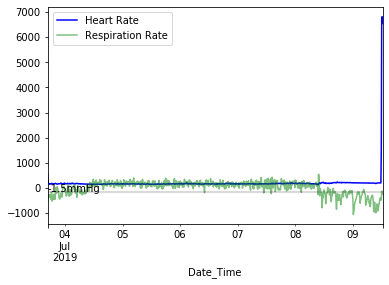

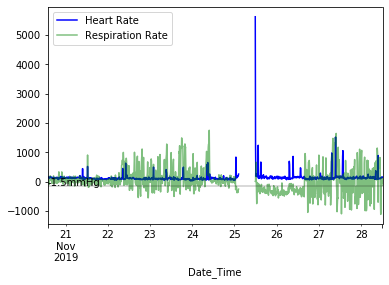

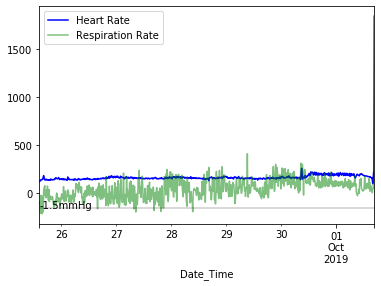

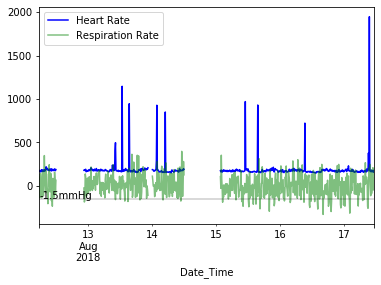

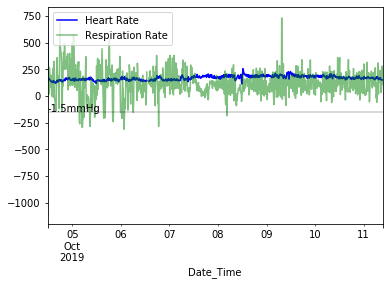

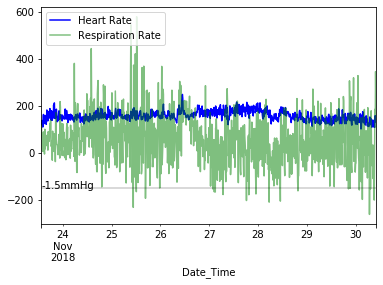

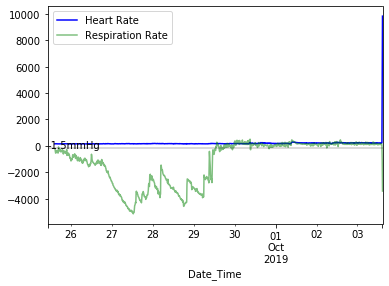

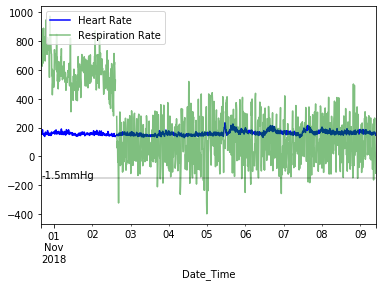

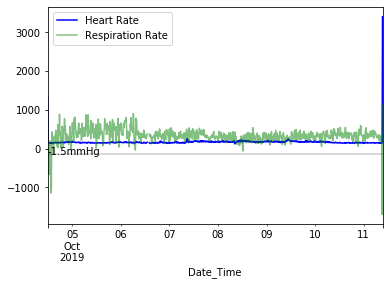

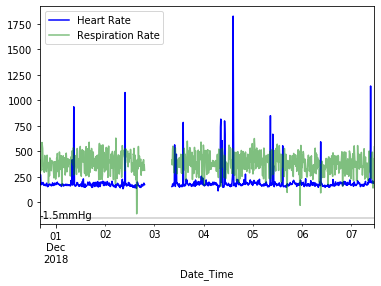

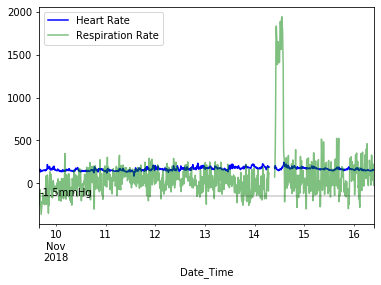

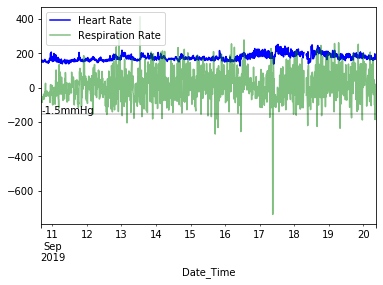

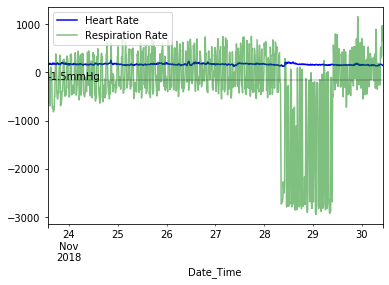

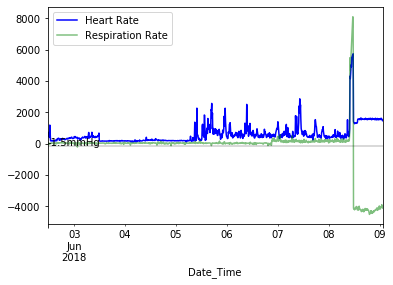

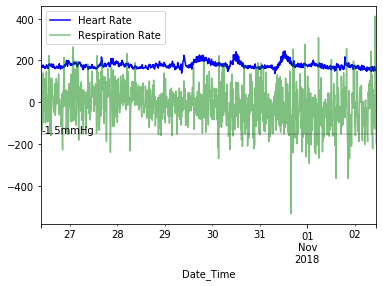

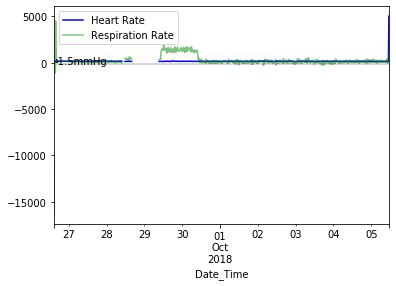

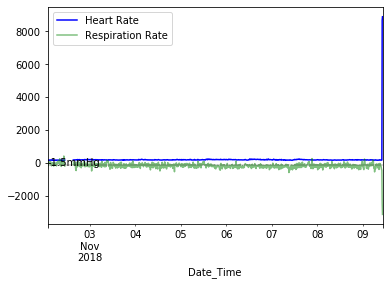

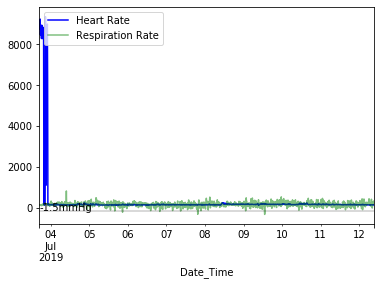

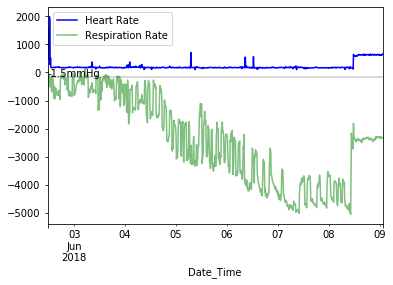

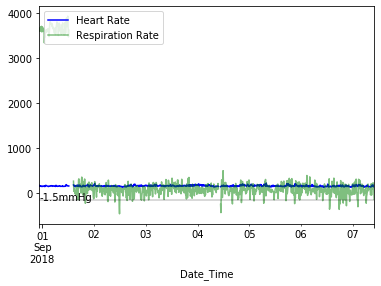

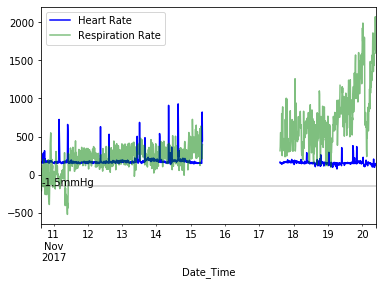

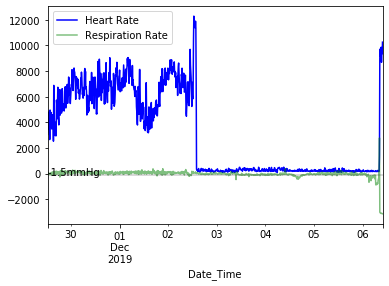

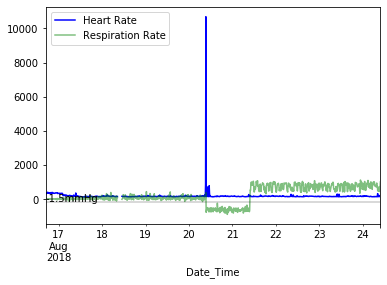

In [387]:
#compare the difference
#specify the data dir before removing noise
PATH = "/Users/leeo/Desktop/KI2/7.master_thesis/1.data/7.revised_object_data_combined_vc2"
EXT = "*.csv"
all_csv_files = [file
                 for path, subdir, files in os.walk(PATH)
                 for file in glob(os.path.join(path, EXT))]
for f in all_csv_files:
    data = pd.read_csv(f, sep=",", header=0,
                       parse_dates=[0], index_col=0)
    print(f)
    plt.figure()
    data["HR"].resample("10T").mean().plot(color="b",alpha=1)
    (data["Resp"]*100).resample("10T").mean().plot(color="g",alpha=0.5)
    plt.legend(["Heart Rate", "Respiration Rate"],
              loc="upper left")
    plt.axhline(-150, alpha=0.2, color ="black")
    plt.text(data.index[0],-150,'-1.5mmHg', color ="black")

/anaconda3/envs/p3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


/Users/leeo/Desktop/KI2/7.master_thesis/1.data/8.revised_object_data_combined_vc3/19118.csv


/anaconda3/envs/p3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


/Users/leeo/Desktop/KI2/7.master_thesis/1.data/8.revised_object_data_combined_vc3/19286.csv


/anaconda3/envs/p3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


/Users/leeo/Desktop/KI2/7.master_thesis/1.data/8.revised_object_data_combined_vc3/19244.csv
/Users/leeo/Desktop/KI2/7.master_thesis/1.data/8.revised_object_data_combined_vc3/18163.csv


/anaconda3/envs/p3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


/Users/leeo/Desktop/KI2/7.master_thesis/1.data/8.revised_object_data_combined_vc3/19231.csv


/anaconda3/envs/p3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


/Users/leeo/Desktop/KI2/7.master_thesis/1.data/8.revised_object_data_combined_vc3/18273.csv


/anaconda3/envs/p3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


/Users/leeo/Desktop/KI2/7.master_thesis/1.data/8.revised_object_data_combined_vc3/19234.csv


/anaconda3/envs/p3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


/Users/leeo/Desktop/KI2/7.master_thesis/1.data/8.revised_object_data_combined_vc3/18248.csv


/anaconda3/envs/p3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


/Users/leeo/Desktop/KI2/7.master_thesis/1.data/8.revised_object_data_combined_vc3/19221.csv
/Users/leeo/Desktop/KI2/7.master_thesis/1.data/8.revised_object_data_combined_vc3/18279.csv


/anaconda3/envs/p3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


/Users/leeo/Desktop/KI2/7.master_thesis/1.data/8.revised_object_data_combined_vc3/18251.csv


/anaconda3/envs/p3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


/Users/leeo/Desktop/KI2/7.master_thesis/1.data/8.revised_object_data_combined_vc3/19205.csv


/anaconda3/envs/p3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


/Users/leeo/Desktop/KI2/7.master_thesis/1.data/8.revised_object_data_combined_vc3/18284.csv
/Users/leeo/Desktop/KI2/7.master_thesis/1.data/8.revised_object_data_combined_vc3/18044.csv


/anaconda3/envs/p3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


/Users/leeo/Desktop/KI2/7.master_thesis/1.data/8.revised_object_data_combined_vc3/18233.csv
/Users/leeo/Desktop/KI2/7.master_thesis/1.data/8.revised_object_data_combined_vc3/18230.csv


/anaconda3/envs/p3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


/Users/leeo/Desktop/KI2/7.master_thesis/1.data/8.revised_object_data_combined_vc3/18231.csv


/anaconda3/envs/p3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


/Users/leeo/Desktop/KI2/7.master_thesis/1.data/8.revised_object_data_combined_vc3/19117.csv
/Users/leeo/Desktop/KI2/7.master_thesis/1.data/8.revised_object_data_combined_vc3/18036.csv


/anaconda3/envs/p3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


/Users/leeo/Desktop/KI2/7.master_thesis/1.data/8.revised_object_data_combined_vc3/18181.csv


/anaconda3/envs/p3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


/Users/leeo/Desktop/KI2/7.master_thesis/1.data/8.revised_object_data_combined_vc3/17273.csv


/anaconda3/envs/p3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':
/anaconda3/envs/p3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


/Users/leeo/Desktop/KI2/7.master_thesis/1.data/8.revised_object_data_combined_vc3/19303.csv


/anaconda3/envs/p3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


/Users/leeo/Desktop/KI2/7.master_thesis/1.data/8.revised_object_data_combined_vc3/18169.csv


/anaconda3/envs/p3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


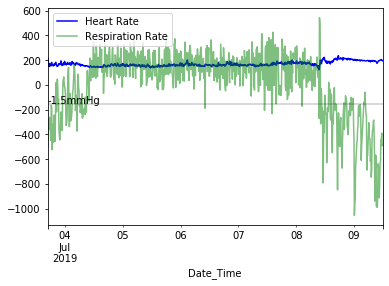

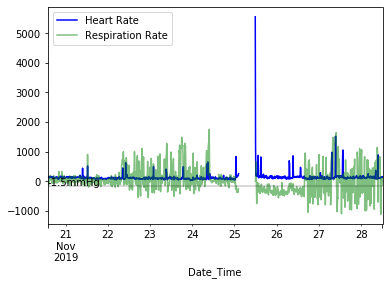

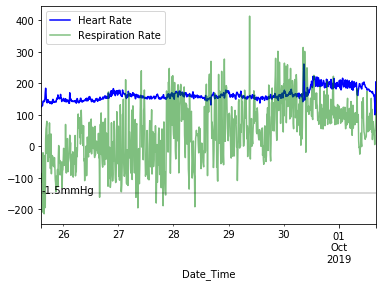

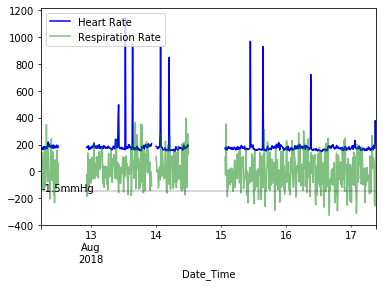

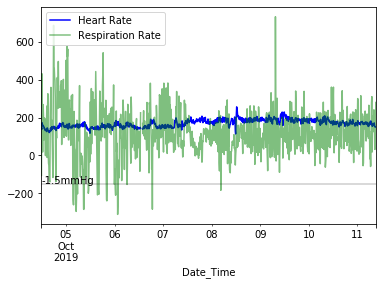

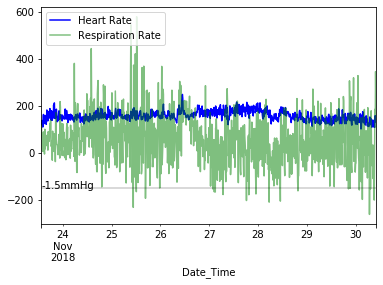

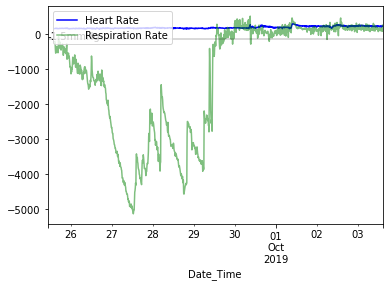

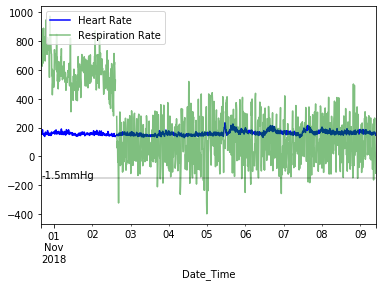

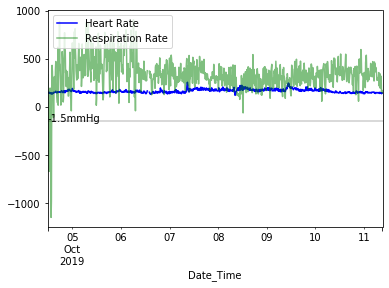

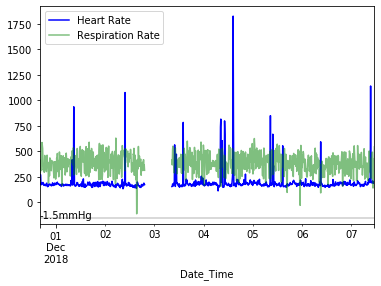

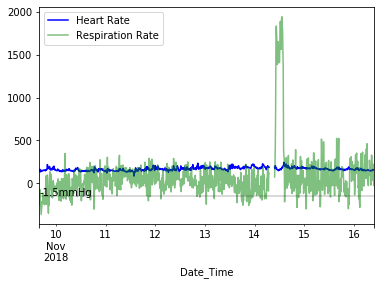

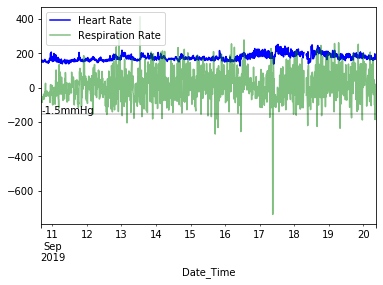

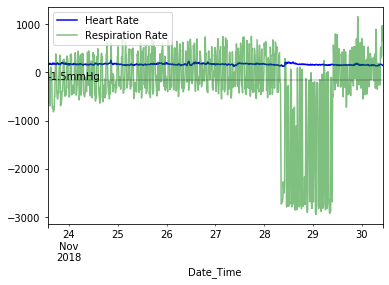

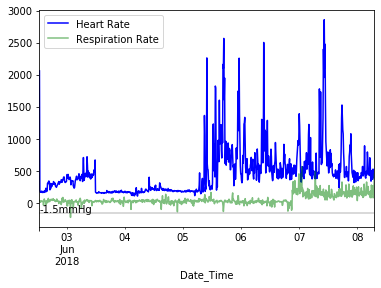

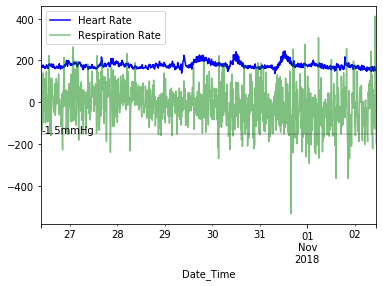

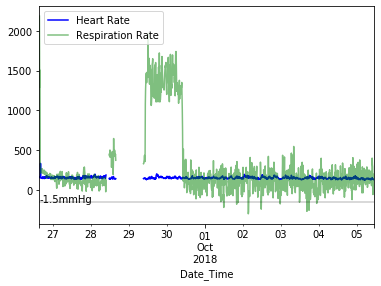

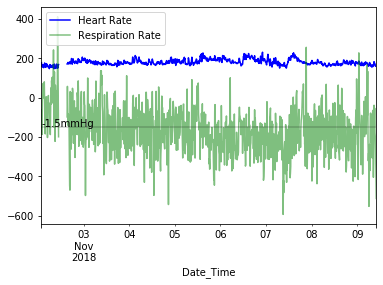

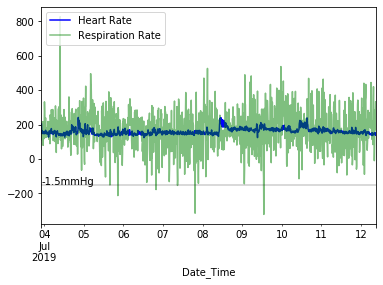

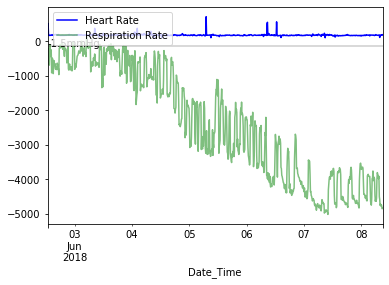

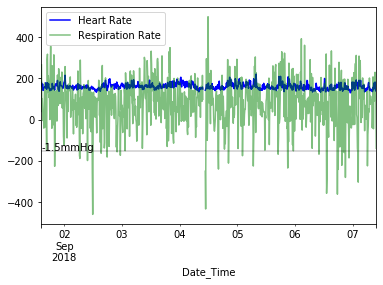

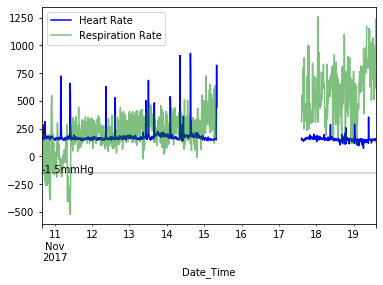

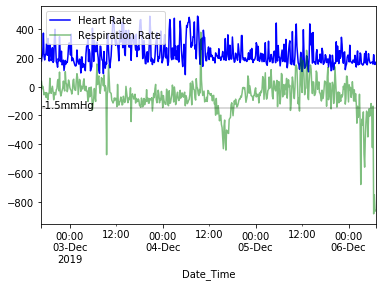

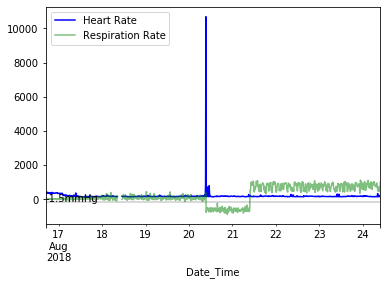

In [388]:
#compare the difference
#specify the data dir after removing noise
PATH = "/Users/leeo/Desktop/KI2/7.master_thesis/1.data/8.revised_object_data_combined_vc3"
EXT = "*.csv"
all_csv_files = [file
                 for path, subdir, files in os.walk(PATH)
                 for file in glob(os.path.join(path, EXT))]
for f in all_csv_files:
    data = pd.read_csv(f, sep=",", header=0,
                       parse_dates=[0], index_col=0)
    print(f)
    plt.figure()
    data["HR"].resample("10T").mean().plot(color="b",alpha=1)
    (data["Resp"]*100).resample("10T").mean().plot(color="g",alpha=0.5)
    plt.legend(["Heart Rate", "Respiration Rate"],
              loc="upper left")
    plt.axhline(-150, alpha=0.2, color ="black")
    plt.text(data.index[0],-150,'-1.5mmHg', color ="black")

# remove the noise in some certain periods

Text(2018-11-02 10:56:02.039760, -200, 'end_remove')

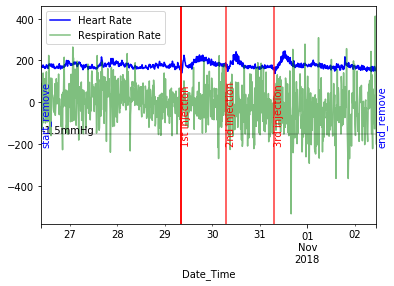

In [134]:
#specify the start and the end to be removed
start_remove = "2018-10-26 09:43:03.357100"
end_remove = "2018-11-02 10:56:02.039760"

#check the data with visualization lines
data["HR"].resample("10T").mean().plot(color="b",alpha=1)
(data["Resp"]*100).resample("10T").mean().plot(color="g",alpha=0.5)
plt.legend(["Heart Rate", "Respiration Rate"],
          loc="upper left")
plt.axvline(t1, alpha=0.8, color ="red")
plt.text(t1,-200,'1st injection', color ="red",rotation=90)
plt.axvline(t2, alpha=0.8, color ="red")
plt.text(t2,-200,'2nd injection', color ="red",rotation=90)
plt.axvline(t3, alpha=0.8, color ="red")
plt.text(t3,-200,'3rd injection', color ="red",rotation=90)
plt.axhline(-150, alpha=0.2, color ="black")
plt.text(data.index[0],-150,'-1.5mmHg', color ="black")
plt.axvline(t1, alpha=0.8, color ="red")
plt.text(start_remove,-200,'start_remove', color ="blue",rotation=90)
plt.axvline(t1, alpha=0.8, color ="red")
plt.text(end_remove,-200,'end_remove', color ="blue",rotation=90)

In [129]:
#slice the data if needed
data = data.loc[(data.index < start_remove) | (data.index > end_remove)]

# Check the sparsity of each object

In [389]:
#check the sparsity of all data
import os
from glob import glob
PATH = "/Users/leeo/Desktop/KI2/7.master_thesis/1.data/8.revised_object_data_combined_vc3/"
EXT = "*.csv"
all_csv_files = [file
                 for path, subdir, files in os.walk(PATH)
                 for file in glob(os.path.join(path, EXT))]
animial_ID = []
sparsity =[]
for i in all_csv_files:
    data = pd.read_csv(i, sep=",", header=0,
                       parse_dates=[0], index_col=0)
    sparsity.append(sum(data.HR.resample("0.5S").mean().isnull())/len(data.HR.resample("0.5S").mean()))
    animial_ID.append(i[-9:-4])

/anaconda3/envs/p3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [390]:
#print out the sparsity
pd.DataFrame(list(zip(animial_ID, sparsity)),
              columns=['animial_ID','sparsity'])

,animial_ID,sparsity
0,19118,0.001082
1,19286,0.050966
2,19244,0.000043
3,18163,0.207378
4,19231,0.006174
5,18273,0.000272
6,19234,0.021887
7,18248,0.004177
8,19221,0.006133
9,18279,0.081688


# remove the noise out of normal range

In [6]:
#set the normal range
#for control animal, the range for HR should be [60,320] RR:[-50,50]mmHg
#for experiment animal, the range for HR should be [60,500] RR:[-70,70]mmHg
HR_low = 60
HR_high = 320
Resp_low = -50
Resp_high = 50

In [107]:
#replace the value out of normal range with NaN
#pd.options.mode.chained_assignment = None
data.HR[(data.HR<HR_low)|(data.HR>HR_high)] =None
data.Resp[(data.Resp<Resp_low)|(data.Resp>Resp_high)] =None

#Check the number of missing values
missing_HR=data["HR"].isnull().sum()
missing_Resp=data["Resp"].isnull().sum()
print("There are {} noises for HR, {} for Resp.".format(missing_HR, missing_Resp))

There are 482 noises for HR, 0 for Resp.


The shape of data is:  (1218149, 3)


Text(2018-10-26 09:43:02.857100, -150, '-1.5mmHg')

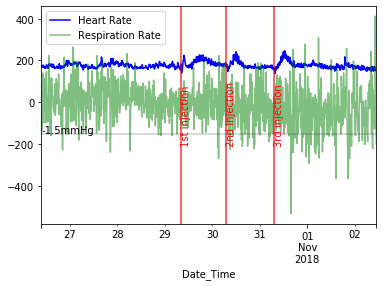

In [110]:
#quick look at the data
print("The shape of data is: ", data.shape)
data["HR"].resample("10T").mean().plot(color="b",alpha=1)
(data["Resp"]*100).resample("10T").mean().plot(color="g",alpha=0.5)
plt.legend(["Heart Rate", "Respiration Rate"],
          loc="upper left")
plt.axvline(t1, alpha=0.8, color ="red")
plt.text(t1,-200,'1st injection', color ="red",rotation=90)
plt.axvline(t2, alpha=0.8, color ="red")
plt.text(t2,-200,'2nd injection', color ="red",rotation=90)
plt.axvline(t3, alpha=0.8, color ="red")
plt.text(t3,-200,'3rd injection', color ="red",rotation=90)
plt.axhline(-150, alpha=0.2, color ="black")
plt.text(data.index[0],-150,'-1.5mmHg', color ="black")

# replace the missing value with carry forward method

In [109]:
#compute missing values with carry forward & backward method
data["HR"].fillna(method='ffill', inplace =True)
data["Resp"].fillna(method='ffill', inplace =True)
data["HR"].fillna(method='bfill', inplace =True)
data["Resp"].fillna(method='bfill', inplace =True)
#check the computation situation
missing_total=data.isnull().sum().sum()
missing_HR=data["HR"].isnull().sum()
missing_Resp=data["Resp"].isnull().sum()
print("There are {} missings in total, and {} for HR, {} for Resp.".format(missing_total, missing_HR, missing_Resp))
if missing_HR != 0:
    raise Exception('Something wrong with missing values computing of HR.')
if missing_Resp != 0:
    raise Exception('Something wrong with missing values computing of Resp.')

There are 1218146 missings in total, and 0 for HR, 0 for Resp.
